In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
path = Path('data')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('data')

In [8]:
# Choose a dataset from https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

#!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz -P {path}

In [9]:
#!7za -bd -y -so x {path}/amazon_reviews_us_Video_Games_v1_00.tsv.gz > {path}/amazon_reviews_us_Video_Games_v1_00.tsv
#!rm {path}/amazon_reviews_us_Video_Games_v1_00.tsv.gz

In [10]:
reviews_df = pd.read_csv(path/'amazon_reviews_us_Video_Games_v1_00.tsv', sep='\t', error_bad_lines=False)
reviews_df.sample()

b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1393119,US,38436497,RNS5QX6GE9CAO,B001TOQ8LG,610231462,The Beatles: Rock Band,Video Games,5,4,4,N,N,A very cool game!!!!!,I was reading some of the negative reviews abo...,2009-09-16


In [11]:
# Leave only 2 columns
reviews_df = reviews_df.loc[:, ['review_body', 'star_rating']]
print(reviews_df.shape[0])
reviews_df.sample()

1780268


,review_body,star_rating
1347479,I like this game alot just recently statred pl...,5


In [12]:
# Remove nans
reviews_df.dropna(inplace=True)
reviews_df.shape[0]

1780209

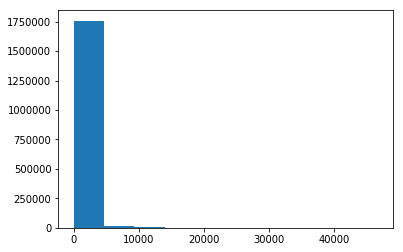

In [13]:
lens = reviews_df['review_body'].map(lambda x: len(x))

plt.hist(lens)
plt.show()

1467900


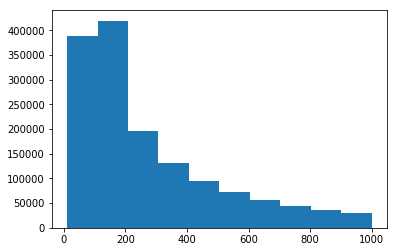

In [14]:
# Remove too short and too long reviews
reviews_df = reviews_df[(lens > 10) & (lens < 1000)]
lens = reviews_df['review_body'].map(lambda x: len(x))
print(reviews_df.shape[0])

plt.hist(lens)
plt.show()

In [25]:
# Convert star ratings to either neg or pos
def convert_func(x):
    if x in (1, 2):
        return 0
    elif x in (4, 5):
        return 1
    return np.nan

reviews_df['rating'] = reviews_df['star_rating'].map(convert_func)
reviews_df.dropna(inplace=True)
reviews_df['rating'].astype(np.uint8, inplace=True)
reviews_df.shape[0]

1350484

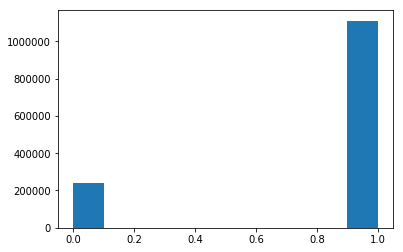

In [26]:
plt.hist(reviews_df['rating'])
plt.show()

In [27]:
# Downsample positive reviews
import random
random.seed(42)

zero_idxs = set(reviews_df[reviews_df['rating'] == 0].index)
one_idxs = set(reviews_df[reviews_df['rating'] > 0].index)
one_idxs = set(random.sample(one_idxs, len(zero_idxs)))
reviews_sampled_df = reviews_df[reviews_df.index.isin(zero_idxs | one_idxs)]
reviews_sampled_df.shape[0]

480420

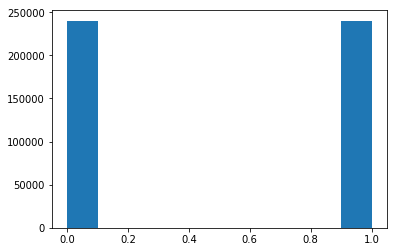

In [28]:
plt.hist(reviews_sampled_df['rating'])
plt.show()

In [30]:
reviews_sampled_df.to_csv(path/'reviews_sampled.tsv', sep='\t', index=False)